In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/fitness_sessions.csv')

In [4]:
print(df.columns.tolist())

['750000', 'male', '177', '81', '7', '87', '39.8', '30.45', '25.85', '0', 'medium', '1', '25', 'overweight']


In [5]:
columns = [
    'id', 'sex', 'height', 'weight', 'duration', 'heart_rate',
    'body_temp', 'calories', 'bmi', 'heart_rate_flag',
    'duration_bucket', 'temp_alert', 'effort_score', 'bmi_category'
]

In [7]:
import os
print(os.listdir())

['appx', 'bin', 'chrome_100_percent.pak', 'chrome_200_percent.pak', 'Code.exe', 'Code.VisualElementsManifest.xml', 'd3dcompiler_47.dll', 'ffmpeg.dll', 'icudtl.dat', 'libEGL.dll', 'libGLESv2.dll', 'LICENSES.chromium.html', 'locales', 'policies', 'resources', 'resources.pak', 'snapshot_blob.bin', 'tools', 'unins000.dat', 'unins000.exe', 'unins000.msg', 'v8_context_snapshot.bin', 'vk_swiftshader.dll', 'vk_swiftshader_icd.json', 'vulkan-1.dll']


In [9]:
df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/fitness_sessions.csv")
df.head()


,id,sex,height,weight,duration,heart_rate,body_temp,calories,bmi,heart_rate_flag,duration_bucket,temp_alert,effort_score,bmi_category
0,750000,male,177,81,7,87,39.8,30.45,25.85,0,Medium,1,25,Overweight
1,750001,male,200,97,20,101,40.5,101.00,24.25,0,Long,1,35,Normal
2,750002,female,188,85,16,102,40.4,81.60,24.05,0,Long,1,34,Normal
3,750003,female,172,73,20,107,40.6,107.00,24.68,0,Long,1,38,Normal
4,750004,female,173,67,16,94,40.5,75.20,22.39,0,Long,1,31,Normal


In [10]:
def flag_heart_rate(df, threshold=100):
    df['heart_rate_flag'] = (df['heart_rate'] > threshold).astype(int)
    return df

def bucket_duration(df):
    df['duration_bucket'] = pd.cut(
        df['duration'],
        bins=[0, 10, 20, float('inf')],
        labels=['Short', 'Medium', 'Long'],
        right=False
    )
    return df

def alert_temp(df, low=36.5, high=37.5):
    df['temp_alert'] = ((df['body_temp'] < low) | (df['body_temp'] > high)).astype(int)
    return df

def compute_effort(df):
    df['effort_score'] = (df['duration'] * df['heart_rate'] / 2 + df['calories'] / 4).round(0).astype(int)
    return df

def categorize_bmi(df):
    df['bmi_category'] = pd.cut(
        df['bmi'],
        bins=[0, 18.5, 24.9, 29.9, float('inf')],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese'],
        right=False
    )
    return df

In [11]:
def transform_fitness_data(df):
    df = flag_heart_rate(df)
    df = bucket_duration(df)
    df = alert_temp(df)
    df = compute_effort(df)
    df = categorize_bmi(df)
    return df

In [12]:
df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/fitness_sessions.csv")
df = transform_fitness_data(df)
df.head()

,id,sex,height,weight,duration,heart_rate,body_temp,calories,bmi,heart_rate_flag,duration_bucket,temp_alert,effort_score,bmi_category
0,750000,male,177,81,7,87,39.8,30.45,25.85,0,Short,1,312,Overweight
1,750001,male,200,97,20,101,40.5,101.00,24.25,1,Long,1,1035,Normal
2,750002,female,188,85,16,102,40.4,81.60,24.05,1,Medium,1,836,Normal
3,750003,female,172,73,20,107,40.6,107.00,24.68,1,Long,1,1097,Normal
4,750004,female,173,67,16,94,40.5,75.20,22.39,0,Medium,1,771,Normal


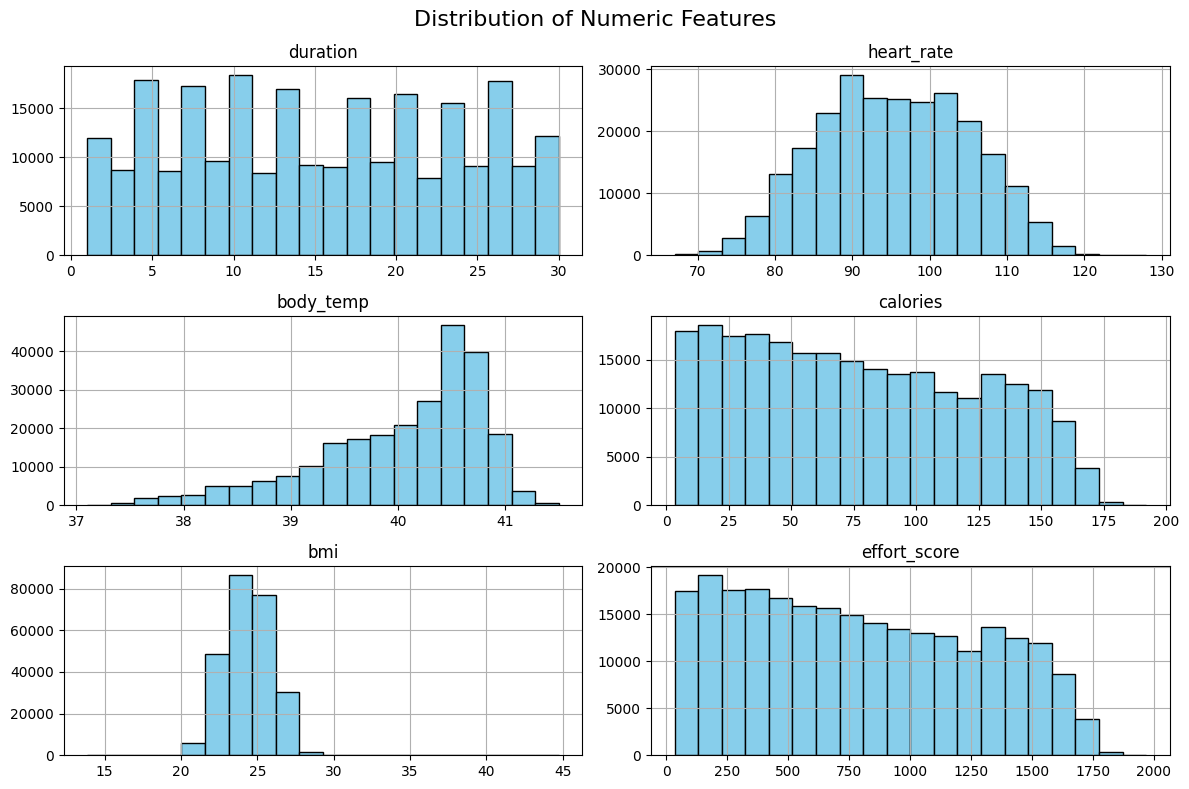

In [13]:
import matplotlib.pyplot as plt

df[['duration', 'heart_rate', 'body_temp', 'calories', 'bmi', 'effort_score']].hist(
    bins=20, figsize=(12, 8), color='skyblue', edgecolor='black'
)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [18]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
